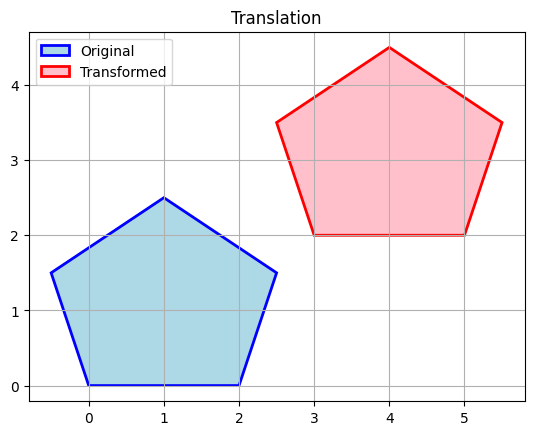

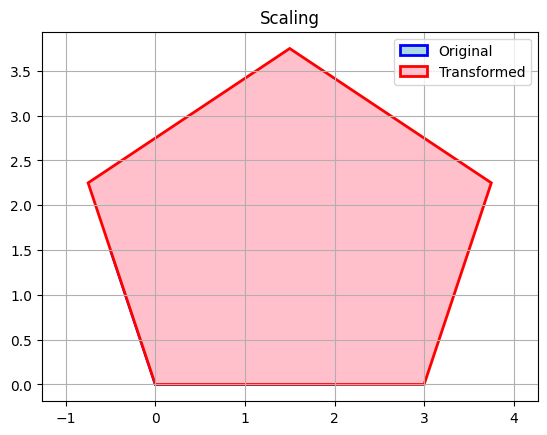

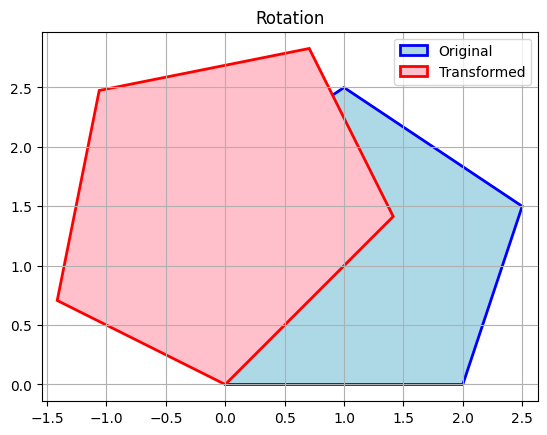

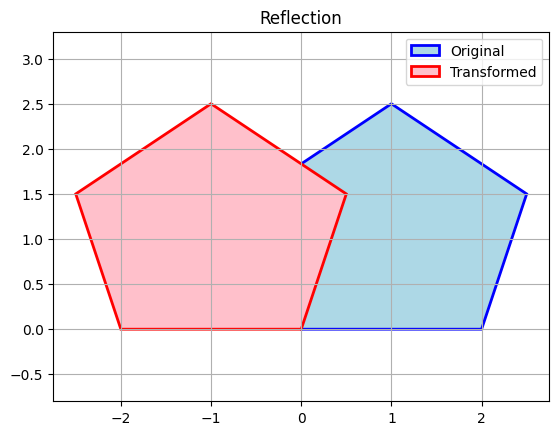

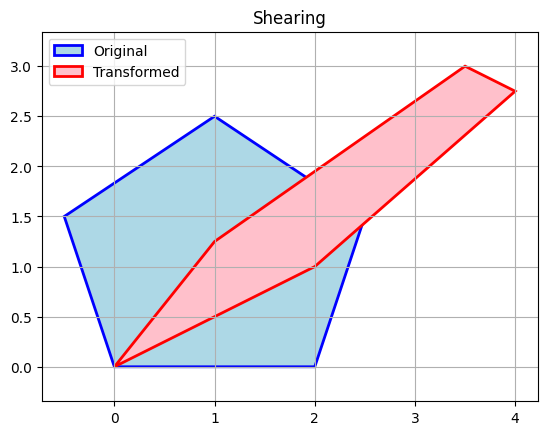

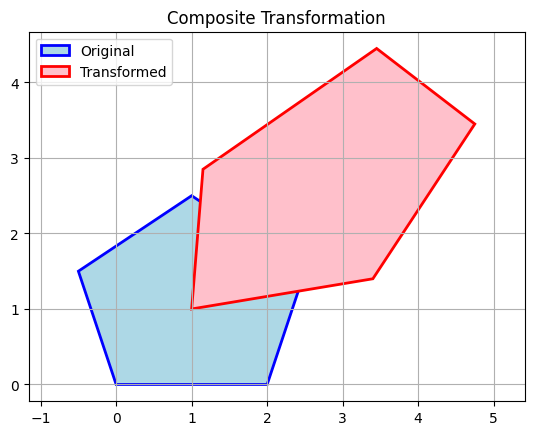

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def translate(points, tx, ty):
    translation_matrix = np.array([[1, 0, tx], [0, 1, ty], [0, 0, 1]])
    return apply_transformation(points, translation_matrix)

def scale(points, sx, sy):
    scaling_matrix = np.array([[sx, 0, 0], [0, sy, 0], [0, 0, 1]])
    return apply_transformation(points, scaling_matrix)

def rotate(points, angle):
    radians = np.radians(angle)
    rotation_matrix = np.array([[np.cos(radians), -np.sin(radians), 0],
                                 [np.sin(radians), np.cos(radians), 0],
                                 [0, 0, 1]])
    return apply_transformation(points, rotation_matrix)

def reflect(points, axis):
    reflection_matrix = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
    if axis == 'x':
        reflection_matrix[1][1] = -1
    elif axis == 'y':
        reflection_matrix[0][0] = -1
    elif axis == 'origin':
        reflection_matrix[0][0] = reflection_matrix[1][1] = -1
    return apply_transformation(points, reflection_matrix)

def shear(points, shx, shy):
    shearing_matrix = np.array([[1, shx, 0], [shy, 1, 0], [0, 0, 1]])
    return apply_transformation(points, shearing_matrix)

def apply_transformation(points, matrix):
    homogeneous_points = np.vstack((points.T, np.ones(points.shape[0])))
    transformed_points = matrix @ homogeneous_points
    return transformed_points[:2].T

def plot_2d_object(original, transformed, title):
    plt.figure()
    plt.fill(*original.T, 'lightblue', edgecolor='blue', linewidth=2, label='Original')
    plt.fill(*transformed.T, 'pink', edgecolor='red', linewidth=2, label='Transformed')
    plt.legend()
    plt.title(title)
    plt.axis('equal')
    plt.grid(True)
    plt.show()

points = np.array([[0, 0], [2, 0], [2.5, 1.5], [1, 2.5], [-0.5, 1.5]])
translated = translate(points, 3, 2)
scaled = scale(points, 1.5, 1.5)
rotated = rotate(points, 45)
reflected = reflect(points, 'y')
sheared = shear(points, 1, 0.5)
combined = apply_transformation(points, np.array([[1.2, 0.5, 1], [0.2, 1.3, 1], [0, 0, 1]]))

plot_2d_object(points, translated, "Translation")
plot_2d_object(points, scaled, "Scaling")
plot_2d_object(points, rotated, "Rotation")
plot_2d_object(points, reflected, "Reflection")
plot_2d_object(points, sheared, "Shearing")
plot_2d_object(points, combined, "Composite Transformation")
